In [1]:
import pandas as pd

df = pd.DataFrame({"Name":["Braund, Mr. Owen Harris",
                           "Allen, Mr. William Henry",
                           "Bonnell, Miss. Elizabeth",
                          ],
                   "Age": [22, 35, 58],
                   "Sex": ["male", "male", "female"],
                  }
                 )
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [2]:
# 컬럼 조회
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

In [3]:
# 최고령자
df['Age'].max()

58

In [4]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [5]:
# 데이터 읽어오기
# df = pd.read_csv('')

In [6]:
# 첫 n줄 조회
df.head(2)

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male


In [7]:
# 마지막 n줄 조회
df.head(2)

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male


In [8]:
# 데이터 타입 조회
df.dtypes

Name    object
Age      int64
Sex     object
dtype: object

In [9]:
# df 엑셀로 내보내기
# df.to_excel('df.xlxs', sheet_name='names', index=False)

In [10]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Sex     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [11]:
# df의 부분집합 조회

titanic = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')

ages = titanic['Age']
print(ages.head())
print(titanic.info())
print(titanic['Age'].shape)

age_sex = titanic[['Age', 'Sex']] # 여러 컬럼 설정시 [[ ]]
print(age_sex.head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891,)
    Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male


In [12]:
# 특정 로우 필터링 조회
# 특정 조건의 로우 조회시, [cond]
# df[cond]; bool의 srs 자료, df[] 내에 사용함으로써 필터 역할
above_35 = titanic[titanic['Age'] > 35]
print(above_35.head())
print(above_35.shape)

    PassengerId  Survived  Pclass  \
1             2         1       1   
6             7         0       1   
11           12         1       1   
13           14         0       3   
15           16         1       2   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
13      5    347082  31.2750   NaN        S  
15      0    248706  16.0000   NaN        S  
(217, 12)


In [13]:
# .isin(); Titanic passengers from cabin class 2 and 3.
print(titanic[(titanic['Pclass'] == 2) | (titanic['Pclass'] == 3)].head())

print(titanic[titanic['Pclass'].isin([2, 3])].head())
# .isin(); 함수 내부의 조건은 [] 필요. 컬럼에서 데이터 조회

   PassengerId  Survived  Pclass                            Name     Sex  \
0            1         0       3         Braund, Mr. Owen Harris    male   
2            3         1       3          Heikkinen, Miss. Laina  female   
4            5         0       3        Allen, Mr. William Henry    male   
5            6         0       3                Moran, Mr. James    male   
7            8         0       3  Palsson, Master. Gosta Leonard    male   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0      1      0         A/5 21171   7.2500   NaN        S  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4  35.0      0      0            373450   8.0500   NaN        S  
5   NaN      0      0            330877   8.4583   NaN        Q  
7   2.0      3      1            349909  21.0750   NaN        S  
   PassengerId  Survived  Pclass                            Name     Sex  \
0            1         0       3         Braund, Mr. Owen Harris    mal

In [14]:
# .notna(); null 데이터 조회
age_no_na = titanic[titanic['Age'].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# .loc[], .iloc[]
# df.loc[row index/cond, cl name/cond]; label
# df.iloc[row indx, cl indx]; position
# df.iloc[row range, cl range]

# 특정 로우/컬럼 조회; the names of the passengers older than 35 years
adult_names = titanic.loc[titanic['Age'] > 35, 'Name']
print(adult_names.head())

# 특정 로우/컬럼 범위 조회; rows 10 till 25 and columns 3 to 5
print(titanic.iloc[9:25, 2:5])

# loc/iloc 활용하여 데이터 추가
titanic.iloc[:3, 3] = 'anonymous'
print(titanic.head())

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object
    Pclass                                               Name     Sex
9        2                Nasser, Mrs. Nicholas (Adele Achem)  female
10       3                    Sandstrom, Miss. Marguerite Rut  female
11       1                           Bonnell, Miss. Elizabeth  female
12       3                     Saundercock, Mr. William Henry    male
13       3                        Andersson, Mr. Anders Johan    male
14       3               Vestrom, Miss. Hulda Amanda Adolfina  female
15       2                   Hewlett, Mrs. (Mary D Kingcome)   female
16       3                               Rice, Master. Eugene    male
17       2                       Williams, Mr. Charles Eugene   

In [16]:
# pd에서 matplot의 plt 생성
import matplotlib.pyplot as plt
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv',
                         index_col=0,
                         parse_dates=True)
# index_col=0; 0번 컬럼을 인덱스로 지정
# parse_dates=True; dates 자료를 Timestamp화
print(air_quality.head())

                     station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN            23.0
2019-05-07 03:00:00             50.5           25.0            19.0
2019-05-07 04:00:00             45.0           27.7            19.0
2019-05-07 05:00:00              NaN           50.4            16.0
2019-05-07 06:00:00              NaN           61.9             NaN


AxesSubplot(0.125,0.2;0.775x0.68)


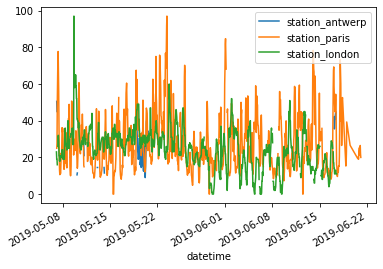

In [17]:
# 요약 시각화 조회; .plot()
print(air_quality.plot())

AxesSubplot(0.125,0.2;0.775x0.68)


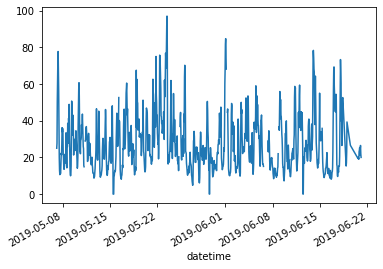

In [18]:
# 특정 컬럼의 데이터 조회; df[cl]
print(air_quality['station_paris'].plot())

AxesSubplot(0.125,0.125;0.775x0.755)


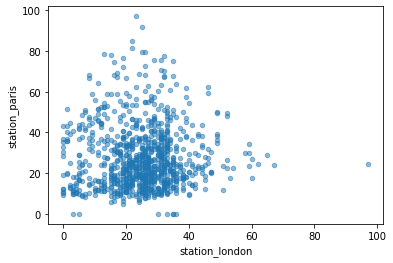

In [19]:
# 산점도로 컬럼별 비교; df.plot.scatter(x=cl1, y=cl2)
print(air_quality.plot.scatter(x = 'station_london', y = 'station_paris', alpha=0.5))
# x, y축에 컬럼 배치
# alpha= ; 점의 투명도

AxesSubplot(0.125,0.125;0.775x0.755)


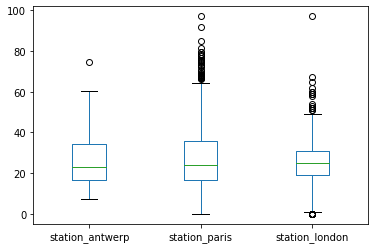

In [20]:
# boxplot; .plot.box()
print(air_quality.plot.box())

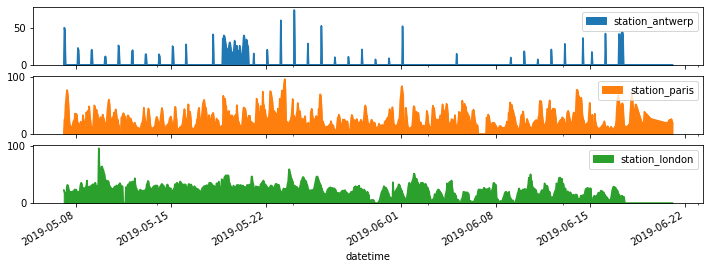

In [21]:
# 컬럼별 나눈 그래프(subplot) 조회
# df.plot.area(); figsize=(a, b) w, h / subplot=True 나누기
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

In [22]:
# 기존 컬럼에서 추출하여 새 컬럼 추가
# df[new_cl] = df[cl]
air_quality['london_mg_per_cubic'] = air_quality['station_london'] * 1.882
print(air_quality.head())

                     station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN           61.9             NaN   

                     london_mg_per_cubic  
datetime                                  
2019-05-07 02:00:00               43.286  
2019-05-07 03:00:00               35.758  
2019-05-07 04:00:00               35.758  
2019-05-07 05:00:00               30.112  
2019-05-07 06:00:00                  NaN  


In [23]:
# 컬럼 비율 계산 후 컬럼 추가; 컬럼과 컬럼 연산 가능
air_quality['ratio_paris_antwerp'] = air_quality['station_paris'] / air_quality['station_antwerp']
print(air_quality.head())

                     station_antwerp  station_paris  station_london  \
datetime                                                              
2019-05-07 02:00:00              NaN            NaN            23.0   
2019-05-07 03:00:00             50.5           25.0            19.0   
2019-05-07 04:00:00             45.0           27.7            19.0   
2019-05-07 05:00:00              NaN           50.4            16.0   
2019-05-07 06:00:00              NaN           61.9             NaN   

                     london_mg_per_cubic  ratio_paris_antwerp  
datetime                                                       
2019-05-07 02:00:00               43.286                  NaN  
2019-05-07 03:00:00               35.758             0.495050  
2019-05-07 04:00:00               35.758             0.615556  
2019-05-07 05:00:00               30.112                  NaN  
2019-05-07 06:00:00                  NaN                  NaN  


In [24]:
# 기존 컬럼명 수정; df.rename(columns={cl1:new_cl1, cl2:new_cl2, ...})
air_quality_renamed = air_quality.rename(columns={'station_antwerp':'BETR801',
                                                  'station_paris':'FR04014',
                                                  'station_london':'London  Westminster',
                                                 }
                                        )
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [25]:
# .mean(); 기본값 로우 기준 평균
titanic['Age'].mean()

29.69911764705882

In [26]:
# .median(); 중앙값
titanic[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [27]:
# df[[cl(s)]].describe(); 컬럼별 요약통계
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [28]:
# 컬럼별 특정 통계값 비교; df.agg({cl1:[...], cl2:[...], ...})
titanic.agg({'Age':['count', 'mean', 'max'],
             'Fare':['count', 'mean', 'max', 'median']
            }
           )

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
max,80.000000,512.329200
median,NaN,14.454200


In [29]:
# df.groupby(); 그룹화
# df[[그룹화대상_cl(s)]].groupby(cl).통계함수()
print(titanic[['Sex', 'Age']].groupby('Sex').mean())

# df.groupby(cl).통계함수()
print(titanic.groupby('Sex').mean())

# df.groupby(cl(s))[cl].통계함수()
print(titanic.groupby('Sex')['Age'].mean())
print(titanic.groupby(['Sex', 'Pclass'])['Fare'].mean())

              Age
Sex              
female  27.915709
male    30.726645
        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64


In [30]:
# df[cl].value_counts(); 카테고리하여 값별로 세기
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
# df.sort_values(by=cl); 컬럼 단위 정렬
print(titanic.sort_values(by='Age').head())

# df.sort_values(by=[cl(s)], ascending=False); 여러 컬럼 내림차순
titanic.sort_values(by=['Pclass', 'Age']).head()

     PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
803  0.42      0      1    2625   8.5167   NaN        C  
755  0.67      1      1  250649  14.5000   NaN        S  
644  0.75      2      1    2666  19.2583   NaN        C  
469  0.75      2      1    2666  19.2583   NaN        C  
78   0.83      0      2  248738  29.0000   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S


                                city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 02:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 03:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 03:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 03:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 04:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 04:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 04:00:00+00:00     London      GB  London Westminster

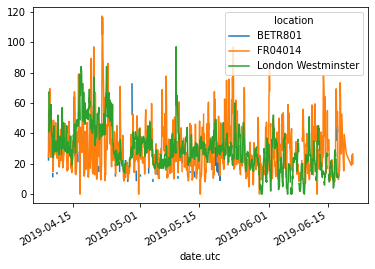

In [32]:
# pivot
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_long.csv',
                         index_col='date.utc', parse_dates=True)
# index_col; 인덱스 컬럼 지정

# 1. no2 필터링
no2 = air_quality[air_quality['parameter'] == 'no2']

# 2. 인덱스별로 정렬하여 location 그룹화
no2_subset = no2.sort_index().groupby(['location']).head()
print(no2_subset)

# 3. df.pivot(columns=cl, values=vl) pivot화
no2_subset_pivot =  no2_subset.pivot(columns='location', values='value')
print(no2_subset_pivot)
print(no2.pivot(columns='location', values='value').plot())

In [33]:
# pivot table; pivot에 통계함수가 필요할 때
# df.pivot_table(values=cl1, index=cl2, columns=cl3, aggfunc=func)
print(air_quality.pivot_table(values='value',
                              index='location',
                              columns='parameter',
                              aggfunc='mean'
                             ))
# margins=True; 통계함수들의 전체값도 필요할 때
print(air_quality.pivot_table(values='value',
                              index='location',
                              columns='parameter',
                              aggfunc='mean',
                              margins=True
                             ))

# groupby도 유사
print(air_quality.groupby(["parameter", "location"]).mean())

parameter                 no2       pm25
location                                
BETR801             26.950920  23.169492
FR04014             29.374284        NaN
London Westminster  29.740050  13.443568
parameter                 no2       pm25        All
location                                           
BETR801             26.950920  23.169492  24.982353
FR04014             29.374284        NaN  29.374284
London Westminster  29.740050  13.443568  21.491708
All                 29.430316  14.386849  24.222743
                                  value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568


In [34]:
# 역pivot
no2_pivoted = no2.pivot(columns='location', values='value').reset_index()
print(no2_pivoted)

# df.melt(id_vars=, value_vars=, value_name=, var_name=)
# value_vars; 피벗에서 컬럼화된 변수를 다시 변수화
# value_name; 값의 컬럼명
# var_name; 컬럼화된 변수의 컬럼명
no_2 = no2_pivoted.melt(id_vars='date.utc',
                        value_vars=['BETR801', 'FR04014', 'London Westminster'],
                        value_name='NO_2',
                        var_name='id_location'
                       )
print(no_2)

location                  date.utc  BETR801  FR04014  London Westminster
0        2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
1        2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2        2019-04-09 03:00:00+00:00     54.5     34.2                67.0
3        2019-04-09 04:00:00+00:00     34.5     48.5                41.0
4        2019-04-09 05:00:00+00:00     46.5     59.5                41.0
...                            ...      ...      ...                 ...
1700     2019-06-20 20:00:00+00:00      NaN     21.4                 NaN
1701     2019-06-20 21:00:00+00:00      NaN     24.9                 NaN
1702     2019-06-20 22:00:00+00:00      NaN     26.5                 NaN
1703     2019-06-20 23:00:00+00:00      NaN     21.8                 NaN
1704     2019-06-21 00:00:00+00:00      NaN     20.0                 NaN

[1705 rows x 4 columns]
                      date.utc         id_location  NO_2
0    2019-04-09 01:00:00+00:00            

In [37]:
# 테이블 결합

air_quality_no2 = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv",
                              parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]
print(air_quality_no2.head())

air_quality_pm25 = pd.read_csv("https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_pm25_long.csv",
                               parse_dates=True)
# air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]
print(air_quality_pm25.head())


                    date.utc location parameter  value
0  2019-06-21 00:00:00+00:00  FR04014       no2   20.0
1  2019-06-20 23:00:00+00:00  FR04014       no2   21.8
2  2019-06-20 22:00:00+00:00  FR04014       no2   26.5
3  2019-06-20 21:00:00+00:00  FR04014       no2   24.9
4  2019-06-20 20:00:00+00:00  FR04014       no2   21.4


ParserError: Error tokenizing data. C error: Expected 1 fields in line 74, saw 4


In [ ]:
air_quality